# Instalação das bibliotécas

In [4]:
#Importar principais bibliotecas para auxiliar na leitura, manipulação, tratamento e análise dos dados
import pandas as pd

# Etiqueta que codifica os recursos categóricos
from sklearn.preprocessing import LabelEncoder

#Importar a biblioteca para criação de gráficos
from matplotlib import pyplot as plt
import seaborn as sns

# Carregar arquivo

In [5]:
dados_osteo = pd.read_csv('/content/osteoporosis.csv')
#Usa biblioteca pandas para abrir arquivo que contem os dados a serem analisados
#Fonte dos dados: https://www.kaggle.com/datasets/amitvkulkarni/lifestyle-factors-influencing-osteoporosis

# Análise dos dados

In [6]:
dados_osteo.head()
#Verificar se o arquivo a ser analisado esta correto. Podendo ser visualizado os dados iniciais

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [7]:
dados_osteo.info()
#Verifica se há dados faltantes e dtype dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [8]:
dados_osteo.isna().sum()
#Verificar e contar dados nulos em todas em alguma coluna.

Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

In [9]:
dados_osteo.duplicated().sum()
#Identificar se há linhas duplicadas

0

In [10]:
dados_osteo.describe(include='all')
#Verificar concentração dos dados e/ ou discrepantes

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
count,1.958000e+03,1958.000000,1958,1958,1958,1958,1958,1958,1958,1958,1958,970,1311,973,1958,1958.000000
unique,NaN,NaN,2,2,2,3,2,2,2,2,2,1,2,1,2,NaN
top,NaN,NaN,Male,Normal,No,African American,Normal,Low,Sufficient,Active,Yes,Moderate,Hyperthyroidism,Corticosteroids,Yes,NaN
freq,NaN,NaN,992,981,998,681,1027,1004,1011,1021,982,970,678,973,983,NaN
mean,1.549929e+06,39.101124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
std,2.614250e+05,21.355424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500128
min,1.100064e+06,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,1.319163e+06,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,1.546028e+06,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
75%,1.775870e+06,53.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


# Pré-processamento

In [11]:
dados_osteo = dados_osteo.drop("Id",axis=1)
#Exclui a coluna de 'ID' por não apresentar dados uteis a partir desse momento

In [12]:
dados_osteo['Alcohol Consumption'].unique()
#Mostra quais são as caracteristicas presentes na coluna desejada

array(['Moderate', nan], dtype=object)

In [13]:
dados_osteo['Medical Conditions'].unique()
#Mostra quais são as caracteristicas presentes na coluna desejada

array(['Rheumatoid Arthritis', nan, 'Hyperthyroidism'], dtype=object)

In [14]:
dados_osteo['Medications'].unique()
#Mostra quais são as caracteristicas presentes na coluna desejada

array(['Corticosteroids', nan], dtype=object)

In [45]:
dados_osteo['Alcohol Consumption'] = dados_osteo['Alcohol Consumption'].fillna('Not provided')
dados_osteo['Medical Conditions'] = dados_osteo['Medical Conditions'].fillna('Not provided')
dados_osteo['Medications'] = dados_osteo['Medications'].fillna('Not provided')
#Substitui os valores nulos da coluna 'Alcohol Consumption', 'Medical Conditions' e 'Medications' por Not provided

In [16]:
cols = ['Gender','Hormonal Changes','Family History','Race/Ethnicity','Body Weight','Calcium Intake','Vitamin D Intake','Physical Activity','Medications', 'Smoking','Alcohol Consumption','Medical Conditions','Prior Fractures']

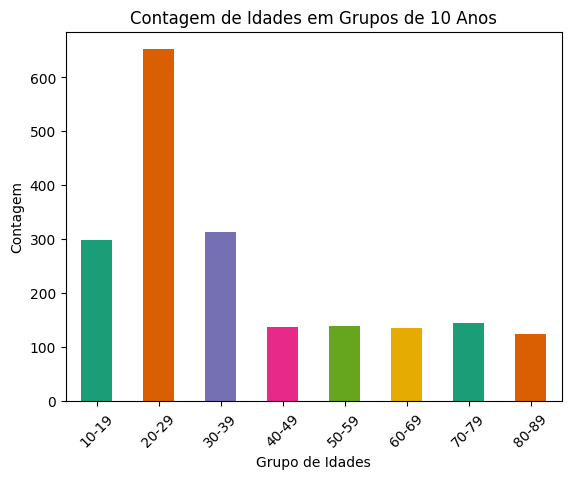

In [17]:
#Gráfico da faixa etária
#Seleciona do dataframe somente a coluna 'Age'
df = dados_osteo['Age']
df = pd.DataFrame(df)

# Criar grupos de idade
bins = range(10, 91, 10)  # Intervalos de 10 em 10 anos de 10 a 90
labels = [f'{i}-{i+9}' for i in bins[:-1]]
df['grupo_idade'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Contar frequências
contagem_grupos = df['grupo_idade'].value_counts().sort_index()

# Plotar o gráfico
contagem_grupos.plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Contagem de Idades em Grupos de 10 Anos')
plt.xlabel('Grupo de Idades')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

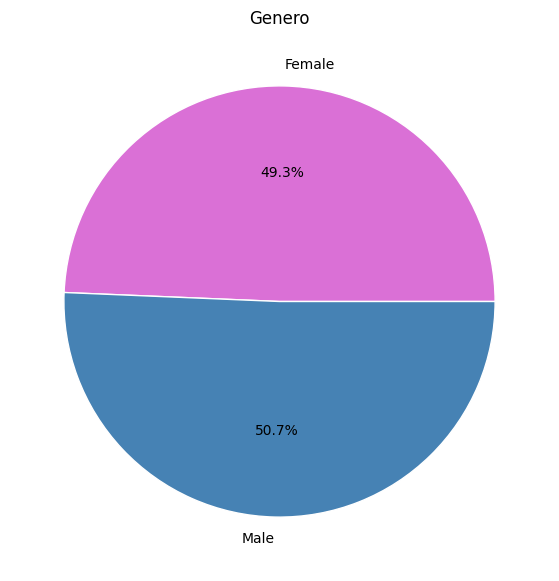

In [83]:
#Gráfico de sexo
#Agrupa os dados pela coluna 'Gender' e constroi um gráfico para identificar o genero na amostra
dados_agrupados = dados_osteo.groupby('Gender').size()
cores = ['orchid', 'steelblue']

plt.figure(figsize=(10, 7))
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Genero')
plt.axis('off')
plt.show()

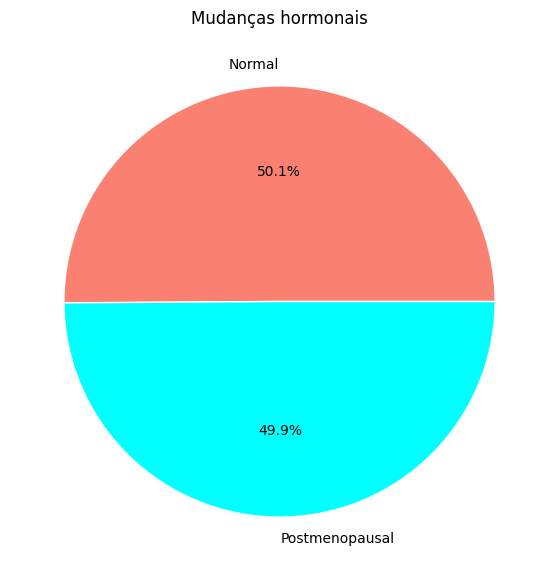

In [80]:
#Agrupa os dados pela coluna 'Hormonal Changes' e constroi um gráfico para identificar se houve mudanças hormonal
dados_agrupados = dados_osteo.groupby('Hormonal Changes').size()
cores = ['salmon', 'aqua']

plt.figure(figsize=(10, 7))
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Mudanças hormonais')
plt.axis('off')
plt.show()

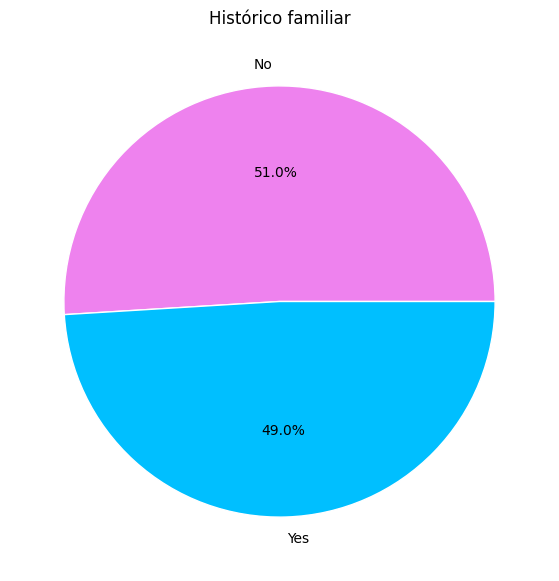

In [84]:
#Agrupa os dados pela coluna 'Family History' e constroi um gráfico para identificar se há histórico familiar
dados_agrupados = dados_osteo.groupby('Family History').size()
cores = ['violet', 'deepskyblue']

plt.figure(figsize=(10, 7))
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Histórico familiar')
plt.axis('off')
plt.show()

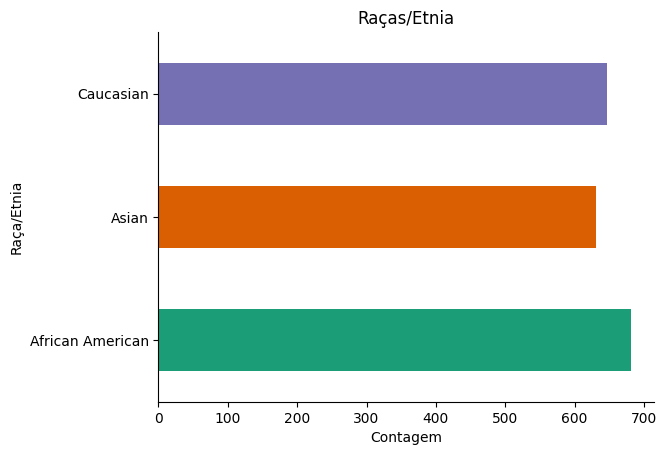

In [21]:
#Agrupa os dados pela coluna 'Hormonal Changes' e constroi um gráfico para identificar as raças identificadas na amostra
dados_osteo.groupby('Race/Ethnicity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Raças/Etnia')
plt.xlabel('Contagem')
plt.ylabel('Raça/Etnia')
plt.show()

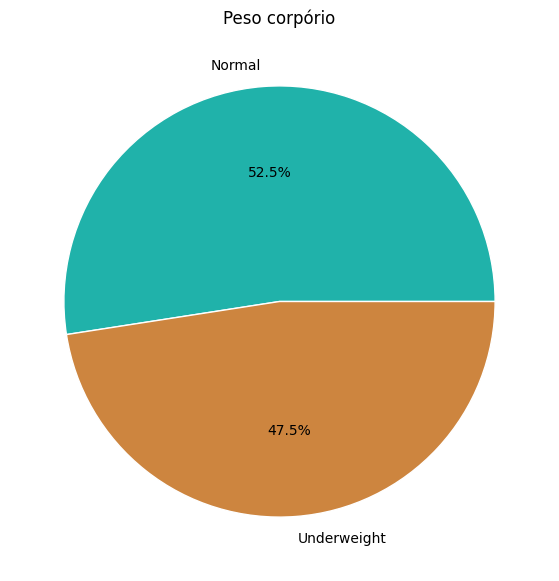

In [86]:
#Agrupa os dados pela coluna 'Body Weight' e constroi um gráfico para identificar o estatus do peso corpório do paciente na amostra
dados_agrupados = dados_osteo.groupby('Body Weight').size()
cores = ['lightseagreen', 'peru']

plt.figure(figsize=(10, 7))
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Peso corpório')
plt.axis('off')
plt.show()

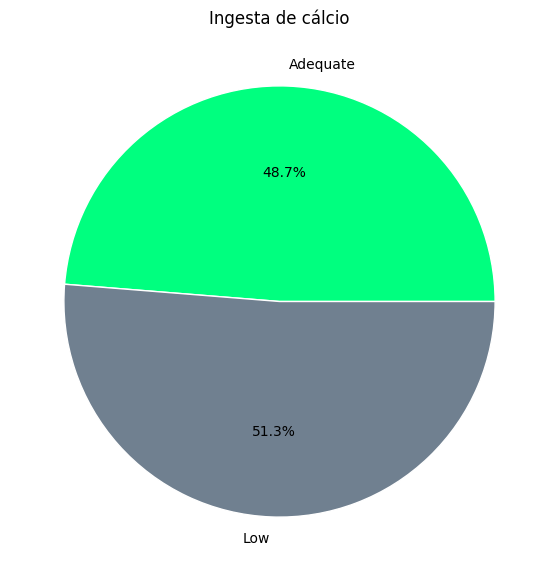

In [91]:
#Agrupa os dados pela coluna 'Calcium Intake' e constroi um gráfico para identificar se a ingestão de cálcio é adequado
dados_agrupados = dados_osteo.groupby('Calcium Intake').size()
cores = ['springgreen', 'slategray']

plt.figure(figsize=(10, 7))
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Ingesta de cálcio')
plt.axis('off')
plt.show()

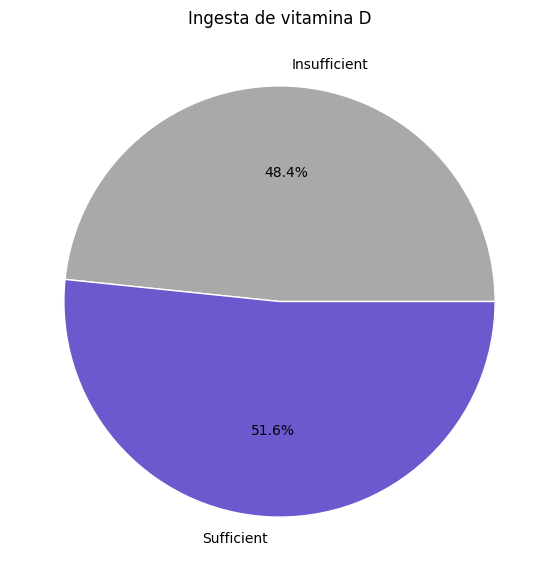

In [94]:
#Agrupa os dados pela coluna 'Vitamin D Intake' e constroi um gráfico para identificar se a ingestão de vitamina D é adequado
dados_agrupados = dados_osteo.groupby('Vitamin D Intake').size()
cores = ['darkgray', 'slateblue']

plt.figure(figsize=(10, 7))
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Ingesta de vitamina D')
plt.axis('off')
plt.show()

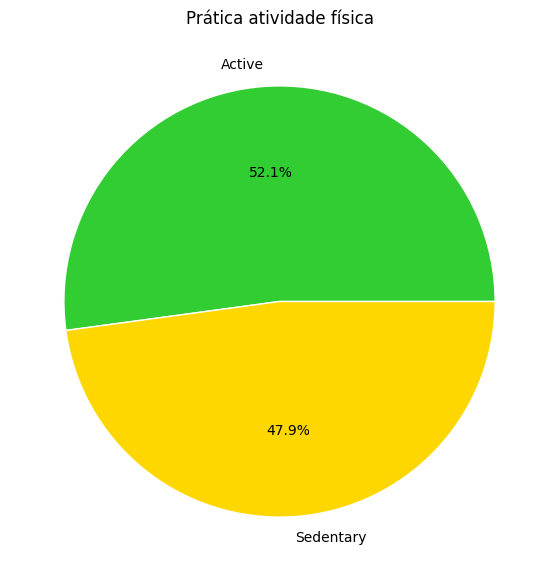

In [96]:
#Agrupa os dados pela coluna 'Physical Activity' e constroi um gráfico para identificar se realiza atividade física
dados_agrupados = dados_osteo.groupby('Physical Activity').size()
cores = ['limegreen', 'gold']

plt.figure(figsize=(10, 7))
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Prática atividade física')
plt.axis('off')
plt.show()

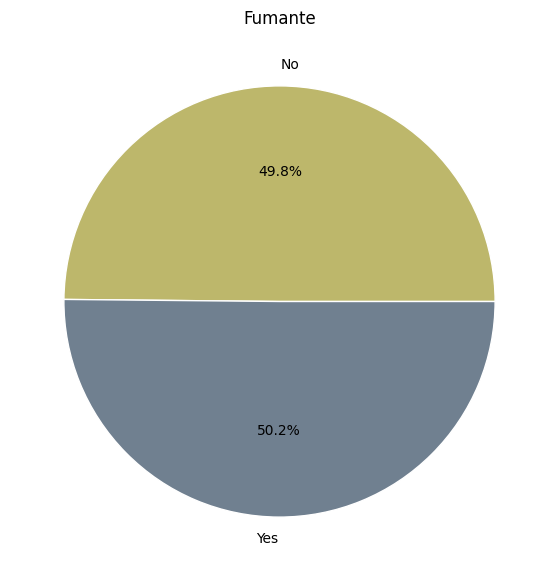

In [102]:
#Agrupa os dados pela coluna 'Smoking' e constroi um gráfico para identificar se realiza atividade física
dados_agrupados = dados_osteo.groupby('Smoking').size()
cores = ['darkkhaki', 'slategray']

plt.figure(figsize=(10, 7))
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Fumante')
plt.axis('off')
plt.show()

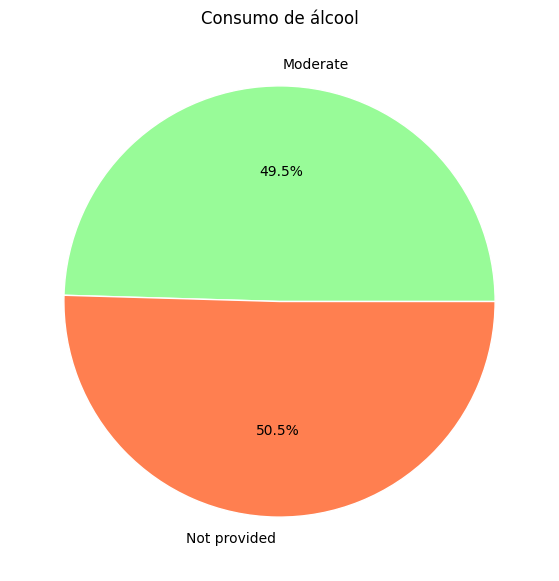

In [103]:
#Agrupa os dados pela coluna 'Alcohol Consumption' e constroi um gráfico para identificar se faz consumo de alcool
dados_agrupados = dados_osteo.groupby('Alcohol Consumption').size()
cores = ['palegreen', 'coral']

plt.figure(figsize=(10, 7))
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Consumo de álcool')
plt.axis('off')
plt.show()

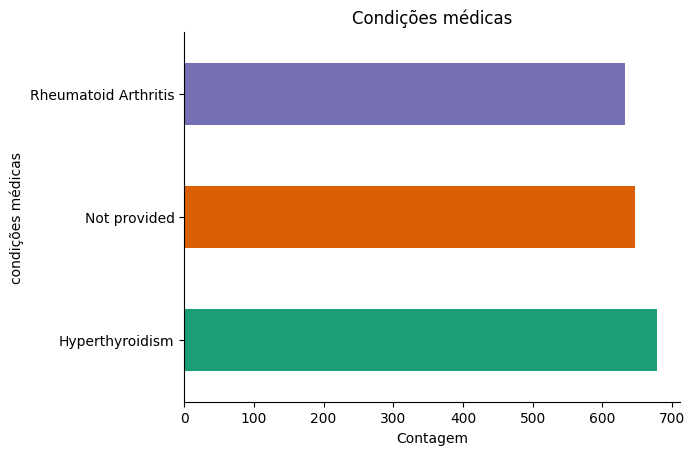

In [34]:
#Agrupa os dados pela coluna 'Medical Conditions' e constroi um gráfico para identificar as condições médicas
dados_agrupados = dados_osteo.groupby('Medical Conditions').size()
cores = sns.color_palette('Set2', len(dados_agrupados))

dados_osteo.groupby('Medical Conditions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Condições médicas')
plt.xlabel('Contagem')
plt.ylabel('condições médicas')
plt.show()

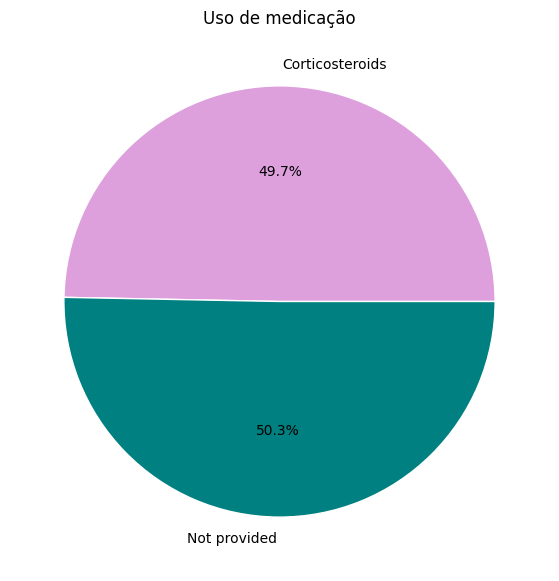

In [106]:
#Agrupa os dados pela coluna 'Medications' e constroi um gráfico para identificar se faz uso de medicação
dados_agrupados = dados_osteo.groupby('Medications').size()
cores = ['plum', 'teal']

plt.figure(figsize=(10, 7))
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Uso de medicação')
plt.axis('off')
plt.show()

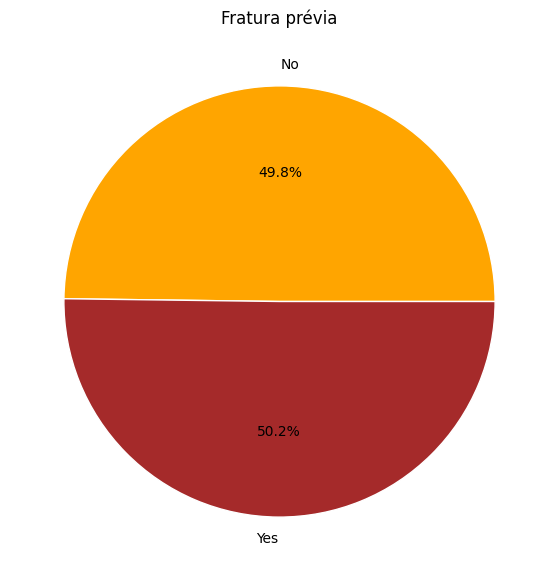

In [107]:
#Agrupa os dados pela coluna 'Prior Fractures' e constroi um gráfico para identificar se já teve fraturas prévias
dados_agrupados = dados_osteo.groupby('Prior Fractures').size()
cores = ['orange', 'brown']

plt.figure(figsize=(10, 7))
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Fratura prévia')
plt.axis('off')
plt.show()

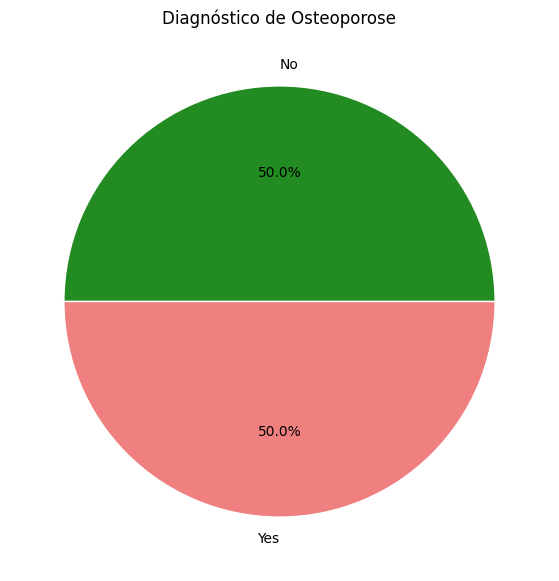

In [108]:
#Cria uma copia só da coluna 'Osteoporosis'
copia_dados = dados_osteo.copy()
copia_dados = pd.DataFrame(copia_dados)

#Altera as caracteristicas da coluna copiada para No e Yes
copia_dados['Osteoporosis'] = copia_dados['Osteoporosis'].replace(0, 'No')
copia_dados['Osteoporosis'] = copia_dados['Osteoporosis'].replace(1, 'Yes')

#Agrupa os dados pela coluna 'Osteoporosis' e constroi um gráfico para identificar se teve o diagnóstico de Osteoporose
dados_agrupados = copia_dados.groupby('Osteoporosis').size()
cores = ['forestgreen', 'lightcoral']

plt.figure(figsize=(10, 7))
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Diagnóstico de Osteoporose')
plt.axis('off')
plt.show()

<ipython-input-104-fddd0b2879c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(copia_dados,x="Osteoporosis", palette=cores)


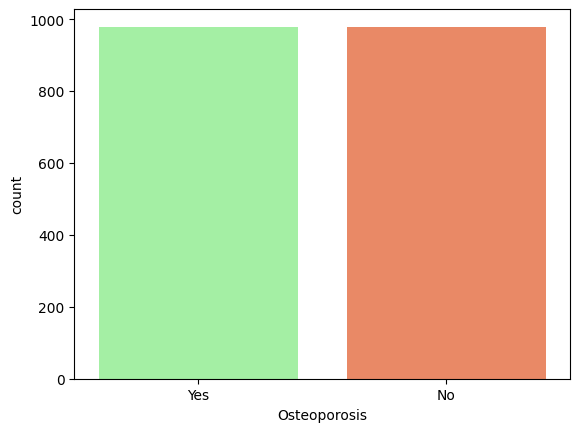

In [104]:
#Grafico para número de pessoas na amostra com diagnóstico de Osteoporose
cores = ['palegreen', 'coral']
sns.countplot(copia_dados,x="Osteoporosis", palette=cores)
plt.show()

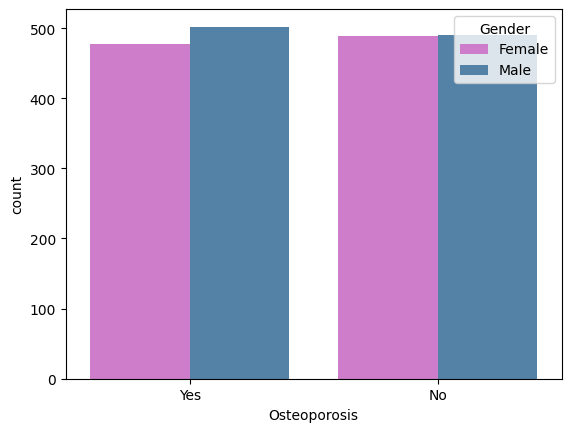

In [105]:
#Grafico para número de pessoas na amostra com diagnóstico de Osteoporose por genero
cores = ['orchid', 'steelblue']
sns.countplot(copia_dados,x="Osteoporosis",hue="Gender", palette=cores)
plt.show()